# Giới Thiệu
Trong bài viết này chúng ta dùng SeaBorn
Để visualization data.
Cùng với matplotlib, seaborn cũng là greatest visualisation tools

Matplotlib: basic plotting: bars, lines, scatter, histogram plots -> chỉ dành để vẽ những biểu đồ đơn giản
Seaborn: Statistics visualisation: summaries data in visualisations and also show the distribution in the data->Trực quan hóa dữ liệu thống kê, tóm tắt dữ liệu bằng đồ thị và cho thấy được những phân bổ trong dữ liệu

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# xem các dataset có sẵn của seaborn 
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


# Một số đồ thị rất phổ biến của Seaborn
* Distribution: có 2 loại phân bổ Histogram, KDE(Kernal Density Estimate)
* Bar Plot: Biểu đồ cột
* Count Plot: Biểu đồ số lượng
* Facet Plot: Tạo ra 1 lớp 2D gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
* Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng.
* Join Plot: Hình dung 1 phân phối chuẩn của 2 biến
* Pair Plot:
* Heat Map: Một kỹ thuật quan sát dữ liệu cho thấy cường độ của một hiện tường là màu sắc ở 2 chiều.

# 1. Distribution
* Univariate distribution of observations

In [3]:
sns.set_theme()

In [7]:
# Load an example dataset
tips_df = sns.load_dataset("tips")
tips_df.shape

(244, 7)

In [8]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


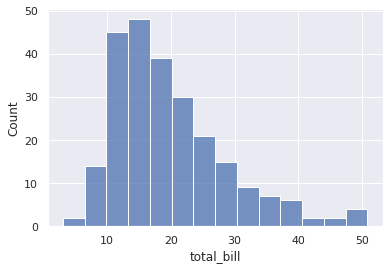

In [9]:
# Vẽ đồ thị histogram, để biết nhiều nhất là bao nhiêu tiền
sns.histplot(data=tips_df['total_bill'])

In [11]:
# đến build
tips_df['total_bill'].value_counts().sort_values(ascending=False)

13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

KDE Plot
* A kernal density astimate (KDE) plot is a method for visualizing the distribution od observations in a dataset, analagous to a histogram.
* KDE represents the data using a continuous probability density curve in one more dimensions


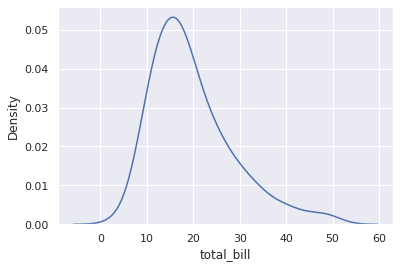

In [13]:
# Ví dụ về biểu KDE
sns.kdeplot(data=tips_df['total_bill'])

Displot
* Informative distributional summaries
* Statistical analyses require knowledge about the distribution of variables in your dataset.
* The seaborn function displot() supports serveral approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernal density estimation

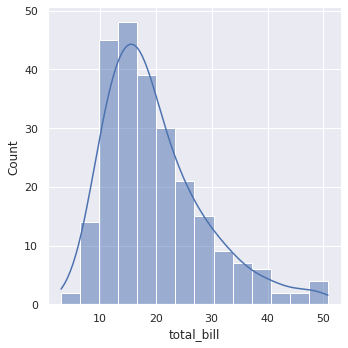

In [15]:
sns.displot(data=tips_df,x='total_bill',kde=True)

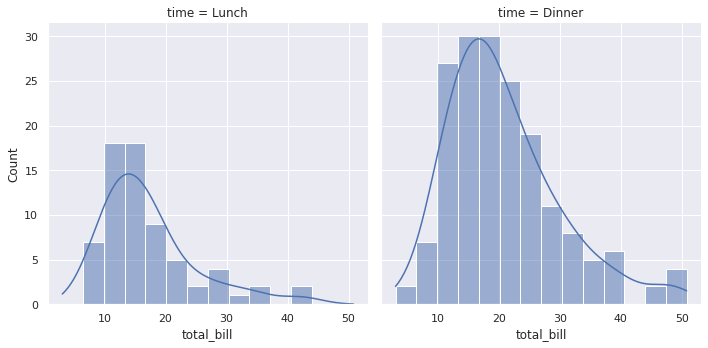

In [16]:
# ví dụ tách riêng buổi ăn trưa và buổi tối
sns.displot(data=tips_df,x='total_bill',col='time',kde=True)

In [19]:
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


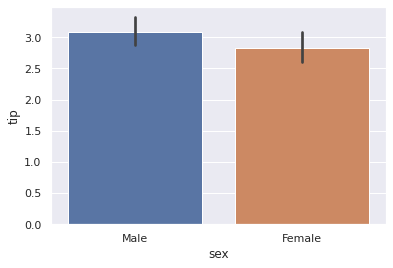

In [20]:
# Ta muốn tìm nam/nữ trung bình trả tiền tips bao nhiêu
sns.barplot(data=tips_df, x='sex',y='tip',estimator=np.mean)

***Count Plot***


In [21]:
# Ví dụ ta muốn có bao nhiêu khách hàng là nam và bao nhiêu khách hàng là nữ
tips_df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

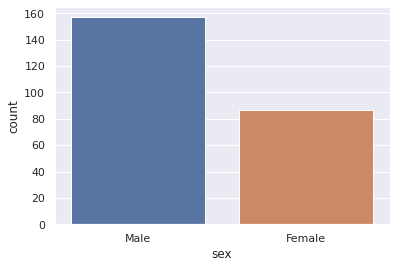

In [22]:
sns.countplot(data=tips_df, x='sex',)

**Box Plot**
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and "maximum")

* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

Kiểm tra dữ liệu của chung ta có đối xứng hay không?

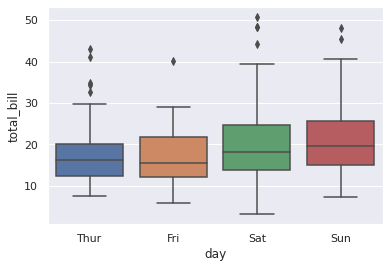

In [23]:
# Chúng ta muốn xe tổng bill trong ngày
sns.boxplot(data=tips_df,x='day',y='total_bill')

Ta sẽ thấy dữ liệu của chúng ta phân bố trong 4 ngày: Thứ 5, Thứ 6, Thứ 7 và Chủ Nhật

Trong ngày Thứ 4 ta dễ dàng thấy tổng tiền thấp nhất khoản 8-dolla cao nhất khoản 30-dolla có 1 số hóa đơn cao bất thường 

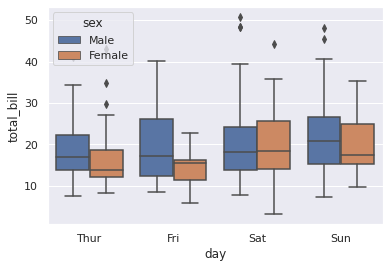

In [24]:
# Giả sử chúng ta muốn xem trong 1 ngày khách hàng nam/nữ order nhiều hơn thì
sns.boxplot(data=tips_df,x='day',y='total_bill',hue='sex')

Chúng ta có thể nhận xét rằng đa số các ngày trong tuần nam sẽ trả tiền nhiều hơn nữ, chỉ có T7 nữ trả tiền nhiều hơn nam 1 chút

**Facet Grid**
* FacetGrid can be drawn with up to three dimensions: row, col and hue
* The main approach for visualizing data on this grid is with the FacetGrid.map() method

In [25]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


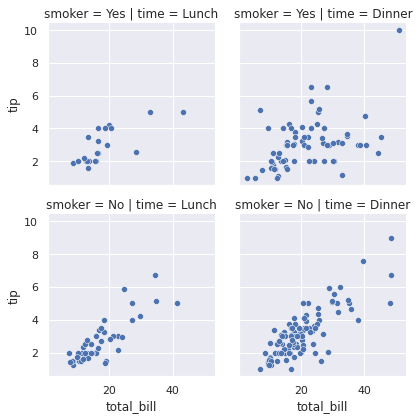

In [26]:
# tìm sự tương quan giữa thời gian, tiền tip và trạng thái có hút thuốc
tips_fg = sns.FacetGrid(data=tips_df,row="smoker",col="time")
tips_fg.map(sns.scatterplot, 'total_bill','tip')

=> Những người hút thuốc có tổng bill ít hơn với những người hút thuốc


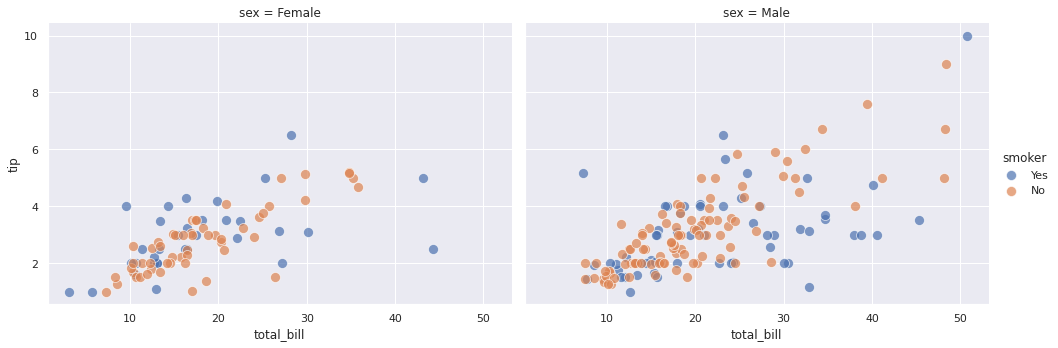

In [37]:
new_fg = sns.FacetGrid(data=tips_df,col='sex',hue="smoker",col_order=['Female','Male'],height=5,aspect=1.4)
new_fg.map(sns.scatterplot,'total_bill','tip',s=100,alpha=0.7)
new_fg.add_legend()

Ta thấy có mối liên hệ tuyến tính giữa tổng bill và tiền tip

**Joint Plot**
Join distribution between two variables along with each variable's marginal distribution
Phân nố giữa 2 biến với nhau

In [40]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Đây là dữ liệu của chim cánh cụt

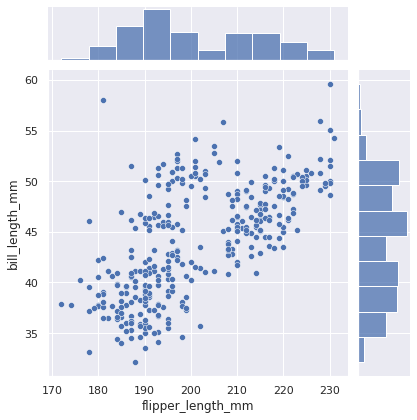

In [41]:
# Ta sẽ tìm độ tương quan của cánh và mỏ
sns.jointplot(data=penguins_df,x='flipper_length_mm',y='bill_length_mm')

# Thấy có vẻ 2 thông tin này chúng tuyến tính nhau, Chúng ta thử tách loài ra xem sao

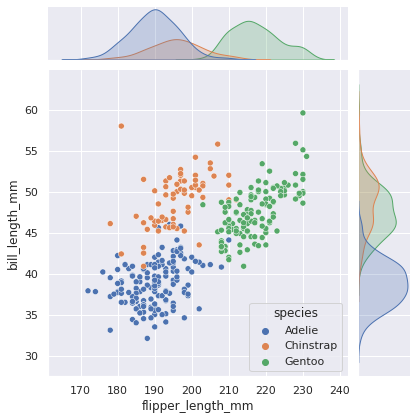

In [42]:
sns.jointplot(data=penguins_df,x='flipper_length_mm',y='bill_length_mm',hue='species')

Ngoài ra, thông thường chúng ta sẽ không thể biết những cặp nào có tương quan với nhau, vì thế chúng ta có thể dùng mode mặc định. Đương nhiên nó chỉ có thể bắt cặp được với dữ liệu là số mà thôi.


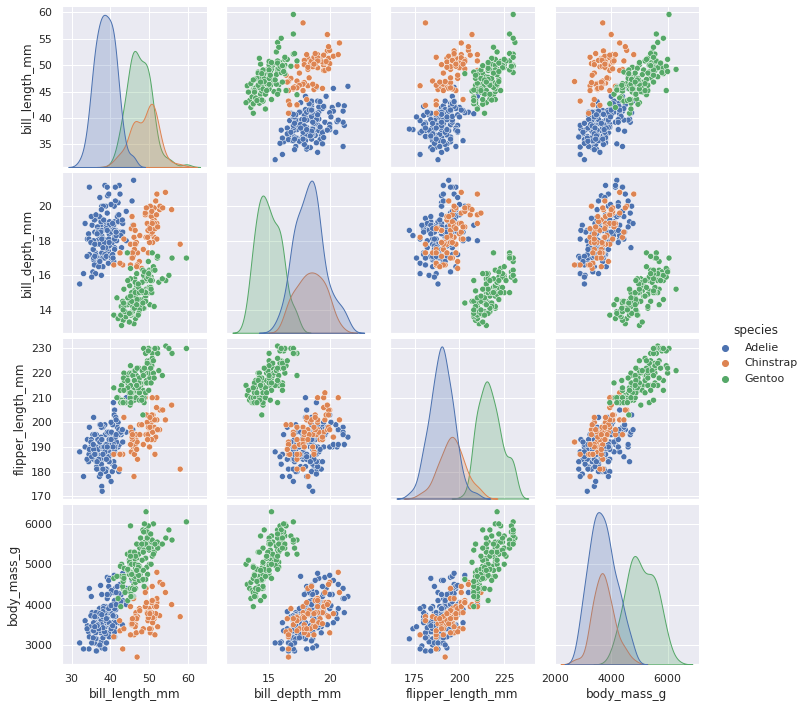

In [44]:
sns.pairplot(data=penguins_df,hue='species')

**Heatmaps**
(Biểu đồ nhiệt độ)
* Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [45]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [46]:
flights_df = sns.load_dataset('flights')
flights_df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Đây là dữ liệu chuyến bay, cho biết có bao nhiêu hành khách bay trong khoản thời gian nào đó.

In [51]:
# Chúng ta sẽ biến đối data để report mỗi column sẽ là từng năm, row = tháng, để biết khoản thời gian nào là đông khách nhất
flights_pv = pd.pivot_table(flights_df,index='month',columns='year',values='passengers')


Như vậy chúng ta chỉ cần hiển thị biểu đồ để thấy trực quan bằng heatmaps

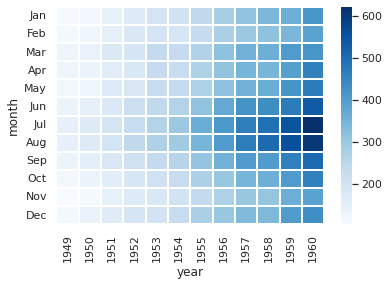

In [54]:
sns.heatmap(data=flights_pv,cmap='Blues',linecolor='white',linewidths=1)

Chúng ta dễ dàng tìm được nguyên tắc của dữ liệu.
